# SAIL Ceilometer Notebook
### This noteboook pulls ceilometer data from SAIL for investigating boundary layer height and precipitating conditions

In [1]:
# Import packages
import ftplib
from contextlib import closing
import urllib.request
import io
import os

# Import visualization and data analysis packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import act

In [2]:
# User and token for pulling in data
username = 'dlhogan@uw.edu'
token = '7f1c805e6ae94c21'
outpath = '/storage/dlhogan/sos/data'

In [3]:
# Product name and start/end dates to pull in
ceil ='gucceilM1.b1'
start = '2021-12-20'
end = '2022-03-1' 

In [4]:
# Download ceilometer data
if not os.path.exists(outpath+'/ceilometer'):
    print('Downloading Data...')
    act.discovery.download_data(username, token, ceil,
                                start, end, output=outpath+'/ceilometer')
else: print(f'Data already downloaded. Located here: {outpath}/ceilometer')

Data already downloaded. Located here: /storage/dlhogan/sos/data/ceilometer


/home/dlhogan/.conda/envs/act_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


<AxesSubplot:title={'center':'gucceilM1.b1 backscatter on 20211220'}, xlabel='Time [UTC]', ylabel='(m)'>

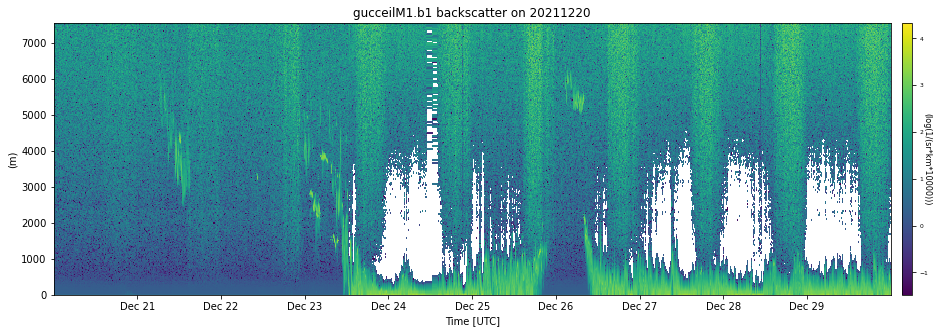

In [5]:
# Pull in and plot some ceilometer data
ceil_dec21_ds = act.io.armfiles.read_netcdf(os.path.join(outpath,f'ceilometer/{ceil}.2021122*'))
ceil_jan22_ds = act.io.armfiles.read_netcdf(os.path.join(outpath,f'ceilometer/{ceil}.202201*'))
ceil_dec21_ds = act.corrections.ceil.correct_ceil(ceil_dec21_ds, -9999.)
ceil_jan22_ds = act.corrections.ceil.correct_ceil(ceil_jan22_ds, -9999.)

In [8]:
%matplotlib inline

/home/dlhogan/.conda/envs/act_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


<AxesSubplot:title={'center':'gucceilM1.b1 first_cbh on 20211220'}, xlabel='Time [UTC]', ylabel='(m)'>

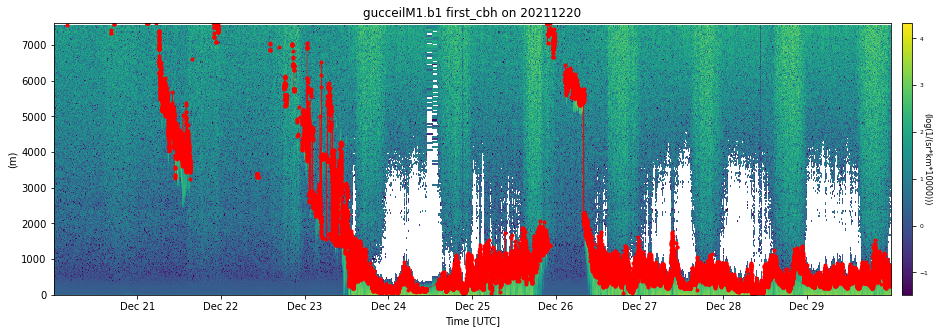

In [17]:
display = act.plotting.TimeSeriesDisplay(
    ceil_dec21_ds, subplot_shape=(1, ), figsize=(15, 5))
display.plot('backscatter', subplot_index=(0, ), cmap='viridis')
display.plot('first_cbh', color='r', linewidth=0.5, subplot_index=(0, ), labels=True)

/home/dlhogan/.conda/envs/act_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


<AxesSubplot:title={'center':'gucceilM1.b1 backscatter on 20220101'}, xlabel='Time [UTC]', ylabel='(m)'>

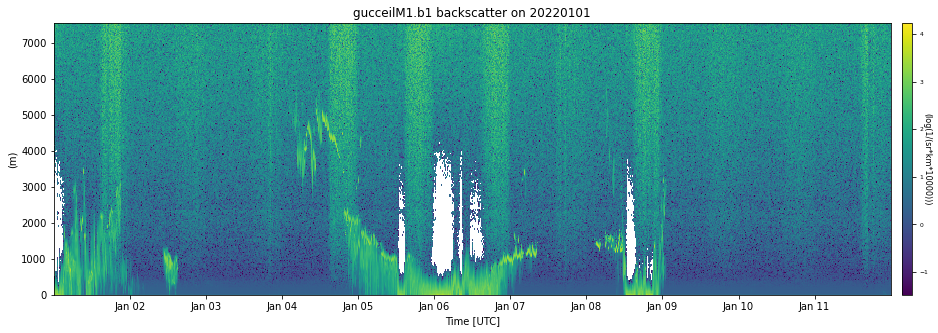

In [10]:
display = act.plotting.TimeSeriesDisplay(
    ceil_jan22_ds.sel(time=slice('2022-01-01','2022-01-11')), subplot_shape=(1, ), figsize=(15, 5))
display.plot('backscatter', subplot_index=(0, ))
# display.plot('first_cbh', color='k', subplot_index=(0, ))

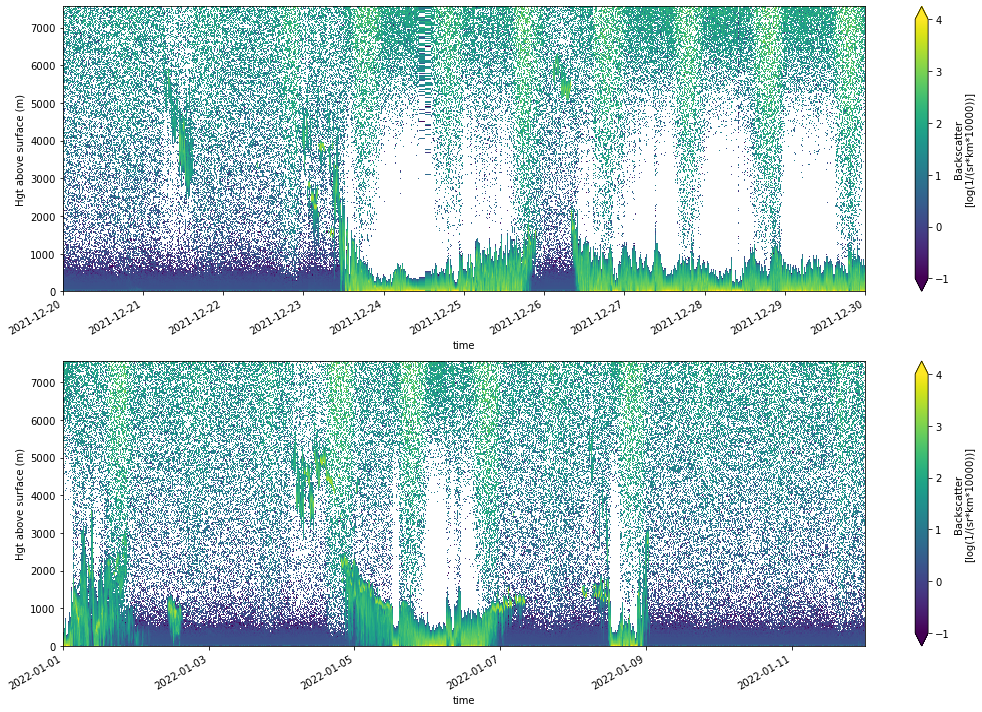

In [28]:
fig,axs = plt.subplots(nrows=2,figsize=(15, 10), tight_layout=True)
ceil_dec21_ds['backscatter'].plot(x='time', ax=axs[0], vmin=-1, vmax=4, cmap='viridis')
ceil_jan22_ds.sel(time=slice('2022-01-01','2022-01-11'))['backscatter'].plot(x='time', ax=axs[1], vmin=-1, vmax=4, cmap='viridis')

for ax in axs:
    ax.set_ylabel('Hgt above surface (m)')